![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


El conjunto de datos incluye información sobre:

- Make: marca del vehículo. tipo: númerico
- Model: modelo del vehículo. tipo: categorico
- mileage: kilometraje del vehículo (en kilómetros). tipo: númerico
- price: precio de venta del vehículo en euros. tipo: númerico
- State: Estado donde se encuentra el vehículo. tipo: categorico
- Year: Año de fabricación del vehículo. tipo: númerico

In [5]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [6]:
df = dataTraining
df.isnull().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [7]:
from IPython.display import Markdown, display

left_padding = 15
# función para mostrar los valores que son texto
def printmd(string):
    display(Markdown(string))
    
printmd("**valores unicos en cada variable**")
for feature in df.columns:
    uniq = np.unique(df[feature])
    print(feature.ljust(left_padding),len(uniq))

**valores unicos en cada variable**

Price           35867
Year            22
Mileage         130600
State           51
Make            38
Model           525


In [8]:
df['Year'].unique()

array([2017, 2015, 2012, 2014, 2013, 2016, 2008, 2005, 2007, 1999, 2004,
       2011, 2010, 2006, 2009, 2003, 2002, 2018, 2001, 2000, 1998, 1997],
      dtype=int64)

In [9]:
df.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


Se observa lo siguiente:
- En la base de datos tenemos 51 Estados
- 38 marcas de vehículos usados
- De las 38 marcas, existen 525 modelos
- Se tiene un horizonte de tiempo de fabricación de los vehícuos de 22 años. desde 1997 a 2018
- Respecto al kilometraje: el minimo es 5 KM, máximo 2'457.832 Km y en promedio 55.072,96 Km
- Respecto al precio: el precio minimo de venta es 5.001 USD, máximo precio de venta es 79.999 USD y en promedio se vende un vehículo en 21.146,91 USD

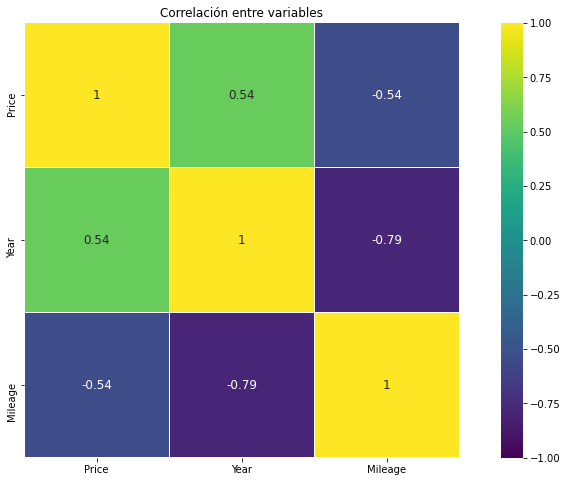

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# CORRELACIÓN ENTRE COVARIABLES

corr = df.corr(method='spearman')
plt.figure(figsize=(15,8))
plt.title("Correlación entre variables")
sns.heatmap(corr[(corr >= 0.0) | (corr <= -0)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 12}, square=True);

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Mileage', 'Year']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Codificar las variables categóricas utilizando OneHotEncoder
ohe_cols = ['State', 'Make', 'Model']
for col in ohe_cols:
    dummy_cols = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_cols], axis=1)
    df.drop(col, axis=1, inplace=True)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
# Entrenar un modelo Random Forest y predecir sobre los datos de prueba
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calcular RMSE y MAE del modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)

Random Forest RMSE: 3805.3930421096525
Random Forest MAE: 2364.2758066670694


In [18]:
XG_reg = XGBRegressor(random_state=42, n_jobs=-1)
XG_reg.fit(X_train, y_train)

y_pred_xg= XG_reg.predict(X_test)

rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg = mean_absolute_error(y_test, y_pred_xg)
print("XGBoost RMSE:", rmse_xg)
print("XGBoost MAE:", mae_xg)

XGBoost RMSE: 4321.8544765816205
XGBoost MAE: 3073.8756999863135


## calibración de los modelos

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
El mejor valor de max_depth es: 19


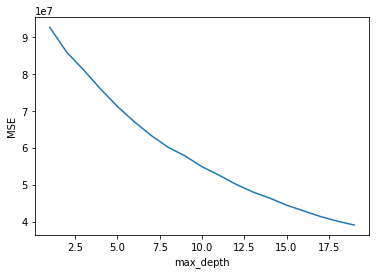

In [20]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Creación de lista de valores para iterar sobre diferentes valores de max_depth
depth_range = range(1, 20)

# Definición de lista para almacenar el MSE promedio por valor de max_depth
mse_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_depth
for depth in depth_range:
    print(depth)
    rf = RandomForestRegressor(max_depth=depth, random_state=42, n_jobs=-1)
    mse_scores.append(-1 * cross_val_score(rf, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

optimal_max_depth = depth_range[mse_scores.index(min(mse_scores))]
print("El mejor valor de max_depth es:", optimal_max_depth)

In [21]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, X_train.shape[1])

# Definición de lista para almacenar el MSE promedio para cada valor de max_features
mse_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    print(feature)
    rf = RandomForestRegressor(max_features=feature, max_depth=optimal_max_depth ,random_state=42, n_jobs=-1)
    mse_scores.append(-1 * cross_val_score(rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, mse_scores)
plt.xlabel('max_features')
plt.ylabel('MSE')

optimal_max_features = feature_range[mse_scores.index(min(mse_scores))]
print("El mejor valor de max_features es:", optimal_max_features)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [ ]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 101, 10)

# Definición de lista para almacenar el MSE promedio para cada valor de n_estimators
mse_scores = []

# Iterar sobre diferentes valores de n_estimators
for estimator in estimator_range:
    print(estimator)
    # Crear un modelo de regresión random forest con el número de estimadores dado y otros parámetros fijos
    rf = RandomForestRegressor(n_estimators=estimator ,max_features=optimal_max_features, max_depth=optimal_max_depth ,random_state=42, n_jobs=-1)
    # Calcular el MSE promedio utilizando 10-fold cross-validation
    mse_scores.append(-1 * cross_val_score(rf, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, mse_scores)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.show()

# Obtener el valor óptimo de n_estimators con el menor MSE promedio
optimal_n_estimators = estimator_range[mse_scores.index(min(mse_scores))]
print("El mejor valor de n_estimators es:", optimal_n_estimators)

In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [19]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
y_pred = rf.predict(dataTesting)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Make
- Model
- State
Feature names seen at fit time, yet now missing:
- Make_Acura
- Make_Audi
- Make_BMW
- Make_Bentley
- Make_Buick
- ...


In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()